In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv.zip" -d "/content/drive/My Drive/Colab Notebooks/NLP mini project/"

Archive:  /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv.zip
  inflating: /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv  


In [0]:
!unzip "/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv.zip" -d "/content/drive/My Drive/Colab Notebooks/NLP mini project/"

Archive:  /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv.zip
  inflating: /content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv  


In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Train.csv")

In [4]:
df_train.shape

(1490, 3)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [0]:
df_train.drop(["ArticleId"],axis=1,inplace=True)

In [6]:
set(df_train["Category"])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [0]:
df_train["labels"] = df_train["Category"].map({"business":0,"entertainment":1,"politics":2,"sport":3,"tech":4})

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(df_train["Text"],df_train["labels"],test_size=0.3, random_state=0)

In [9]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((1043,), (447,), (1043,), (447,))

In [10]:
set(Y_train)

{0, 1, 2, 3, 4}

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
MAX_NO_OF_UNIQUE_WORDS = 30000
tokenizer = Tokenizer(num_words=MAX_NO_OF_UNIQUE_WORDS)
tokenizer.fit_on_texts(X_train)

In [0]:
temp1 = tokenizer.texts_to_matrix(X_train)

In [15]:
tokenizer.get_config()

{'char_level': False,
 'document_count': 1043,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"16": 659, "393": 105, "1385": 37, "4299": 9, "8268": 3, "1162": 39, "1137": 32, "1419": 24, "81": 300, "2278": 18, "15": 816, "31": 473, "6": 1037, "499": 56, "11": 893, "662": 70, "1808": 27, "54": 485, "255": 111, "185": 186, "5": 1037, "25": 796, "1642": 30, "193": 128, "2687": 17, "80": 333, "153": 173, "35": 621, "1932": 18, "13": 883, "139": 214, "64": 413, "202": 180, "557": 78, "931": 49, "213": 158, "115": 228, "21": 827, "639": 63, "4621": 7, "232": 153, "6199": 2, "3": 1035, "22": 695, "91": 230, "329": 83, "977": 49, "2": 1039, "755": 45, "1214": 33, "10007": 2, "855": 51, "549": 82, "132": 179, "5021": 7, "7094": 4, "1641": 30, "277": 123, "161": 198, "1": 1043, "2452": 14, "17": 870, "37": 576, "61": 444, "607": 79, "484": 53, "39": 601, "231": 80, "73": 373, "8": 970, "33": 464, "10009": 2, "1854": 24, "20": 780, "3975": 5, "23": 771, "7": 959, "10": 861, 

In [0]:
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [15]:
len_of_seq_train = [ len(s) for s in X_train]
max_len_after_pad_train = max(len_of_seq_train)
print(max_len_after_pad_train)

3356


In [16]:
len_of_seq_val = [ len(s) for s in X_val ]
max_len_after_pad_val = max(len_of_seq_val)
print(max_len_after_pad_val)

1644


In [17]:
MAX_LEN_OF_SEQ = max([max_len_after_pad_train,max_len_after_pad_val])
print(MAX_LEN_OF_SEQ)

3356


In [18]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("no of unique words = ",V)

no of unique words =  21396


In [19]:
X_train = pad_sequences(X_train)
print("Paded shape : ",X_train.shape)
T = X_train.shape[1]

Paded shape :  (1043, 3356)


In [20]:
X_val = pad_sequences(X_val, maxlen=T)
print("Paded shape : ",X_val.shape)

Paded shape :  (447, 3356)


In [0]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dense, Embedding, GlobalMaxPooling1D, Concatenate, Dropout
from tensorflow.keras.models import Model

In [0]:
D = 60

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32,3)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3)(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(5,activation="softmax")(x)

model = Model(i,x)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3356)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 3356, 60)          1283820   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3354, 32)          5792      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1118, 32)          0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1116, 64)          6208      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 372, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 370, 128)          2470

In [0]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [26]:
r = model.fit(X_train,Y_train, batch_size=32, epochs=10, validation_data=(X_val,Y_val))

Epoch 1/10
33/33 [==============================] - 2s 46ms/step - loss: 1.6039 - accuracy: 0.2196 - val_loss: 1.5953 - val_accuracy: 0.2215
Epoch 2/10
33/33 [==============================] - 1s 33ms/step - loss: 1.5302 - accuracy: 0.3490 - val_loss: 1.5118 - val_accuracy: 0.4072
Epoch 3/10
33/33 [==============================] - 1s 34ms/step - loss: 1.1217 - accuracy: 0.6232 - val_loss: 0.7431 - val_accuracy: 0.7875
Epoch 4/10
33/33 [==============================] - 1s 34ms/step - loss: 0.2939 - accuracy: 0.9319 - val_loss: 0.2909 - val_accuracy: 0.8881
Epoch 5/10
33/33 [==============================] - 1s 35ms/step - loss: 0.0181 - accuracy: 0.9981 - val_loss: 0.2220 - val_accuracy: 0.9239
Epoch 6/10
33/33 [==============================] - 1s 34ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1948 - val_accuracy: 0.9374
Epoch 7/10
33/33 [==============================] - 1s 34ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2200 - val_accuracy: 0.9262
Epoch 8/10
33

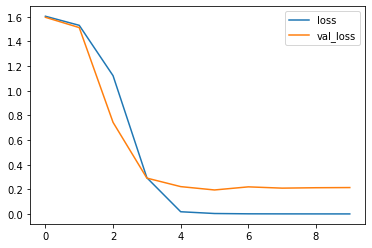

In [27]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

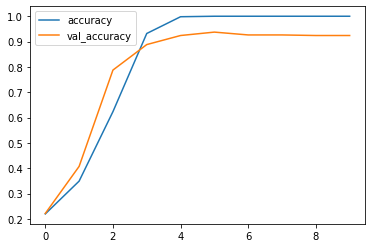

In [28]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/NLP mini project/model.h5")

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Test.csv")
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_test = pad_sequences(X_test, maxlen=T)

In [31]:
X_test.shape

(735, 3356)

In [0]:
res = model.predict(X_test)

In [33]:
res.shape

(735, 5)

In [34]:
res[0]

array([1.1916641e-09, 2.9604429e-02, 3.1398700e-04, 9.7008163e-01,
       8.8579304e-09], dtype=float32)

In [0]:
labels = ["business","entertainment","politics","sport","tech"]
preds = []
for c in res:
  idx = np.argmax(c)
  preds.append(labels[idx])

In [0]:
len(preds)

735

In [0]:
sample_sub = pd.read_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/BBC News Sample Solution.csv")

In [0]:
df_test["Category"] = preds

In [0]:
df_new = df_test.drop(["Text"],axis=1)

In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
 2   Category   735 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.4+ KB


In [39]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Category   735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [0]:
df_new.to_csv("/content/drive/My Drive/Colab Notebooks/NLP mini project/sub_2.csv",index=False)

In [49]:
#Single query ----------------------
q = df_test["Text"][1]
q = tokenizer.texts_to_sequences([q])
print("t t s : ",q)
q = pad_sequences(q, maxlen=T)
print("pad : ",q)

t t s :  [[215, 1941, 106, 62, 147, 215, 10, 55, 28, 78, 1774, 316, 11884, 4, 270, 1749, 21, 5, 541, 23, 45, 15, 167, 18, 2990, 7300, 578, 3, 938, 559, 19, 39, 1149, 3119, 52, 5507, 949, 4, 11885, 20, 3682, 101, 2906, 2, 1522, 3208, 2037, 1, 2028, 529, 1, 304, 660, 11, 9, 5, 468, 172, 6, 1, 118, 372, 9, 7991, 4, 3330, 23, 3275, 5513, 24, 1073, 25, 1, 9471, 3709, 3, 90, 215, 1, 304, 9, 5, 1932, 2445, 178, 298, 150, 9472, 4, 1514, 11388, 11886, 215, 29, 20, 1242, 2707, 2, 924, 5, 304, 35, 55, 1774, 311, 1610, 1475, 11, 4, 16457, 7629, 1420, 471, 504, 43, 4, 43, 274, 24, 1411, 585, 6, 2705, 2566, 18, 5, 500, 3, 372, 7549, 11885, 4, 372, 5976, 24, 112, 4736, 1480, 27, 471, 32, 1130, 233, 2, 1, 291, 2421, 1722, 949, 996, 8627, 5, 778, 2960, 12, 42, 2902, 25, 11887, 279, 578, 10, 43, 60, 1716, 3, 2391, 4, 644, 266, 20, 39, 1829, 3, 76, 491, 3, 5507, 949, 11886, 215, 19, 229, 40, 17, 4377, 2, 2157, 2, 5, 328, 687, 10, 113, 3330, 994, 12, 5, 541, 19, 28, 39, 16458, 17, 7992, 1, 6952, 8, 1370, 

In [0]:
res = model.predict(q)

In [51]:
for c in res:
  idx = np.argmax(c)
  print(labels[idx])
  

tech


In [0]:
import pickle

# saving
with open('/content/drive/My Drive/Colab Notebooks/NLP mini project/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
# loading
with open('/content/drive/My Drive/Colab Notebooks/NLP mini project/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [0]:
layer_name = 'global_max_pooling1d_1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(q)

In [55]:
intermediate_output[0].shape

(128,)

In [56]:
type(intermediate_output[0])

numpy.ndarray